In [66]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from plotly.offline import iplot,plot,download_plotlyjs,init_notebook_mode
import numpy as np

In [2]:
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [4]:
tweets = pd.read_csv("trump_term_tweets.csv")

In [9]:
tweets["Date"] = pd.to_datetime(tweets["date"])

In [11]:
tweets["Date"] =tweets["Date"].apply(lambda x :x.date())

In [13]:
tweets.set_index("Date", inplace=True)

In [15]:
tweets.drop("date", inplace=True, axis=1)

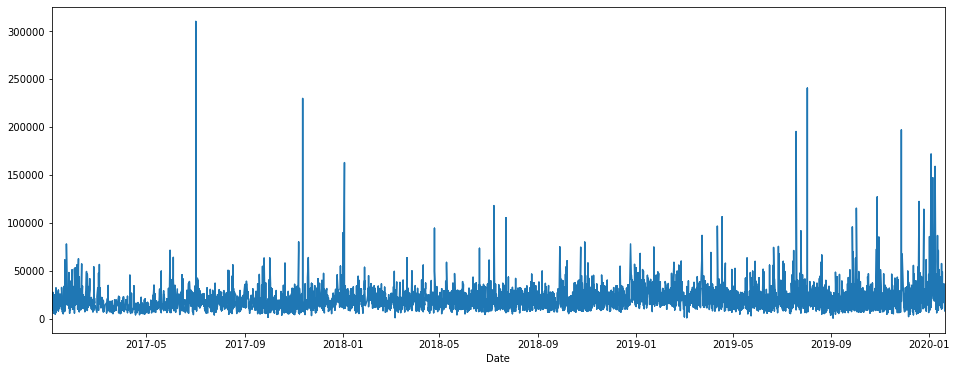

In [20]:
tweets["retweets"].plot(figsize = (16,6))

## lEts find all of the tweets that contain "Trade Deal" 

In [33]:
len([x for x in tweets["content"] if "trade deal" in x.lower()])

93

In [58]:
tweets["content"].apply(lambda x : "trade deal" in x.lower())

Date
2017-01-04    False
2017-01-04    False
2017-01-04    False
2017-01-04    False
2017-01-04    False
              ...  
2020-01-19    False
2020-01-19    False
2020-01-20    False
2020-01-20    False
2020-01-20    False
Name: content, Length: 9982, dtype: bool

In [62]:
trade_tweets = tweets[tweets["content"].apply(lambda x : "trade deal" in x.lower())]["content"]

In [63]:
trade_tweets

Date
2017-04-11    I explained to the President of China that a t...
2017-06-30    Just finished a very good meeting with the Pre...
2017-07-05    The United States made some of the worst Trade...
2017-07-09    The G 20 Summit was a great success for the U....
2017-07-12    "After 14 years, U.S. beef hits Chinese market...
                                    ...                        
2020-01-16    Cryin’ Chuck Schumer is saying privately that ...
2020-01-16    The farmers are really happy with the new Chin...
2020-01-18    “Day after day, really good news on the econom...
2020-01-18    “Trade Deals Drive Stocks To Record Highs.” @ ...
2020-01-19    I will be going to Austin, Texas. Leaving soon...
Name: content, Length: 93, dtype: object

In [64]:
trade_tweet_index = trade_tweets.index

In [65]:
trade_tweet_index

Index([2017-04-11, 2017-06-30, 2017-07-05, 2017-07-09, 2017-07-12, 2017-07-15,
       2017-07-25, 2017-08-14, 2017-08-15, 2017-08-27, 2017-11-14, 2018-03-03,
       2018-03-05, 2018-05-14, 2018-05-16, 2018-05-23, 2018-05-26, 2018-05-26,
       2018-05-29, 2018-06-04, 2018-06-07, 2018-06-08, 2018-06-23, 2018-07-03,
       2018-07-10, 2018-07-14, 2018-07-18, 2018-07-20, 2018-07-20, 2018-08-04,
       2018-08-04, 2018-08-05, 2018-08-06, 2018-08-15, 2018-08-24, 2018-08-28,
       2018-08-29, 2018-09-01, 2018-09-02, 2018-09-03, 2018-10-01, 2018-10-03,
       2018-10-23, 2018-11-07, 2018-11-30, 2018-12-26, 2019-01-01, 2019-01-02,
       2019-01-06, 2019-01-09, 2019-01-11, 2019-01-14, 2019-01-20, 2019-02-17,
       2019-02-25, 2019-03-14, 2019-05-05, 2019-05-08, 2019-06-03, 2019-06-05,
       2019-06-08, 2019-06-22, 2019-06-30, 2019-07-09, 2019-08-01, 2019-08-01,
       2019-08-03, 2019-08-11, 2019-08-15, 2019-08-18, 2019-08-20, 2019-08-21,
       2019-08-25, 2019-09-02, 2019-09-13, 2019-11-1

In [69]:
sp = web.DataReader("^GSPC", "yahoo", start = "2017-1-1")["Adj Close"]

In [70]:
sp

Date
2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-01-30    3283.659912
2020-01-31    3225.520020
2020-02-03    3248.919922
2020-02-04    3297.590088
2020-02-05    3333.919922
Name: Adj Close, Length: 778, dtype: float64